In [1]:
import pandas as pd
housing_data = pd.read_csv('Housing.csv')
housing_data.head(), housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    object 
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  Unnamed: 13       0 non-null      float64
dtypes: float64(1), int64(5), object(8)
memory usage: 59.7+ KB


(           price   area  bedrooms  bathrooms  stories mainroad guestroom  \
 0   1,33,10,000    7500         5          2        3      yes        no   
 1   1,22,60,000    9040         5          4        4      yes        no   
 2   1,22,60,000   10040         4          2        2      yes        no   
 3   1,22,25,000    7580         5          2        2      yes        no   
 4   1,14,20,000    7500         5          1        2      yes       yes   
 
   basement hotwaterheating airconditioning  parking prefarea furnishingstatus  \
 0       no              no             yes        2      yes        furnished   
 1       no              no             yes        3       no        furnished   
 2      yes              no              no        2      yes   semi-furnished   
 3      yes              no             yes        3      yes        furnished   
 4      yes              no             yes        2       no        furnished   
 
    Unnamed: 13  
 0          NaN  
 1    

In [3]:
# Step 1: Data Cleaning and Transformation

# Drop the completely empty column
housing_data.drop(columns=["Unnamed: 13"], inplace=True)



In [5]:
# Step 2 : Data cleaning Convert the 'price' column to numeric by removing commas
housing_data['price'] = housing_data['price'].str.replace(',', '').astype(float)


categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']


binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    housing_data[col] = housing_data[col].map({'yes': 1, 'no': 0})


housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)


housing_data.info(), housing_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    int64  
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   mainroad                         545 non-null    int64  
 6   guestroom                        545 non-null    int64  
 7   basement                         545 non-null    int64  
 8   hotwaterheating                  545 non-null    int64  
 9   airconditioning                  545 non-null    int64  
 10  parking                          545 non-null    int64  
 11  prefarea                         545 non-null    int64  
 12  furnishingstatus_semi-

(None,
         price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
 0  13310000.0   7500         5          2        3         1          0   
 1  12260000.0   9040         5          4        4         1          0   
 2  12260000.0  10040         4          2        2         1          0   
 3  12225000.0   7580         5          2        2         1          0   
 4  11420000.0   7500         5          1        2         1          1   
 
    basement  hotwaterheating  airconditioning  parking  prefarea  \
 0         0                0                1        2         1   
 1         0                0                1        3         0   
 2         1                0                0        2         1   
 3         1                0                1        3         1   
 4         1                0                1        2         0   
 
    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
 0                            False                

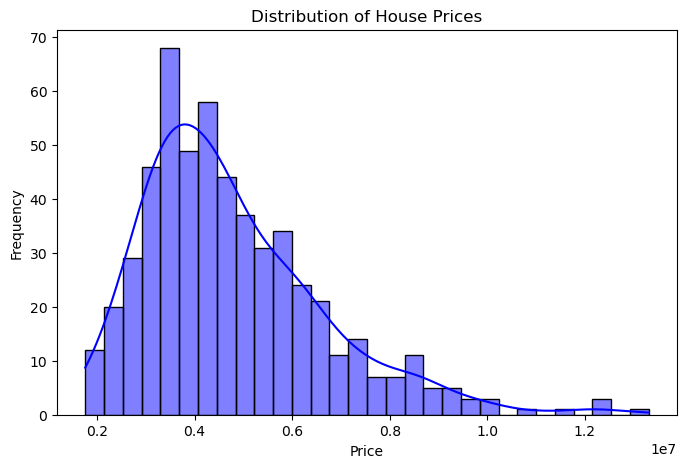

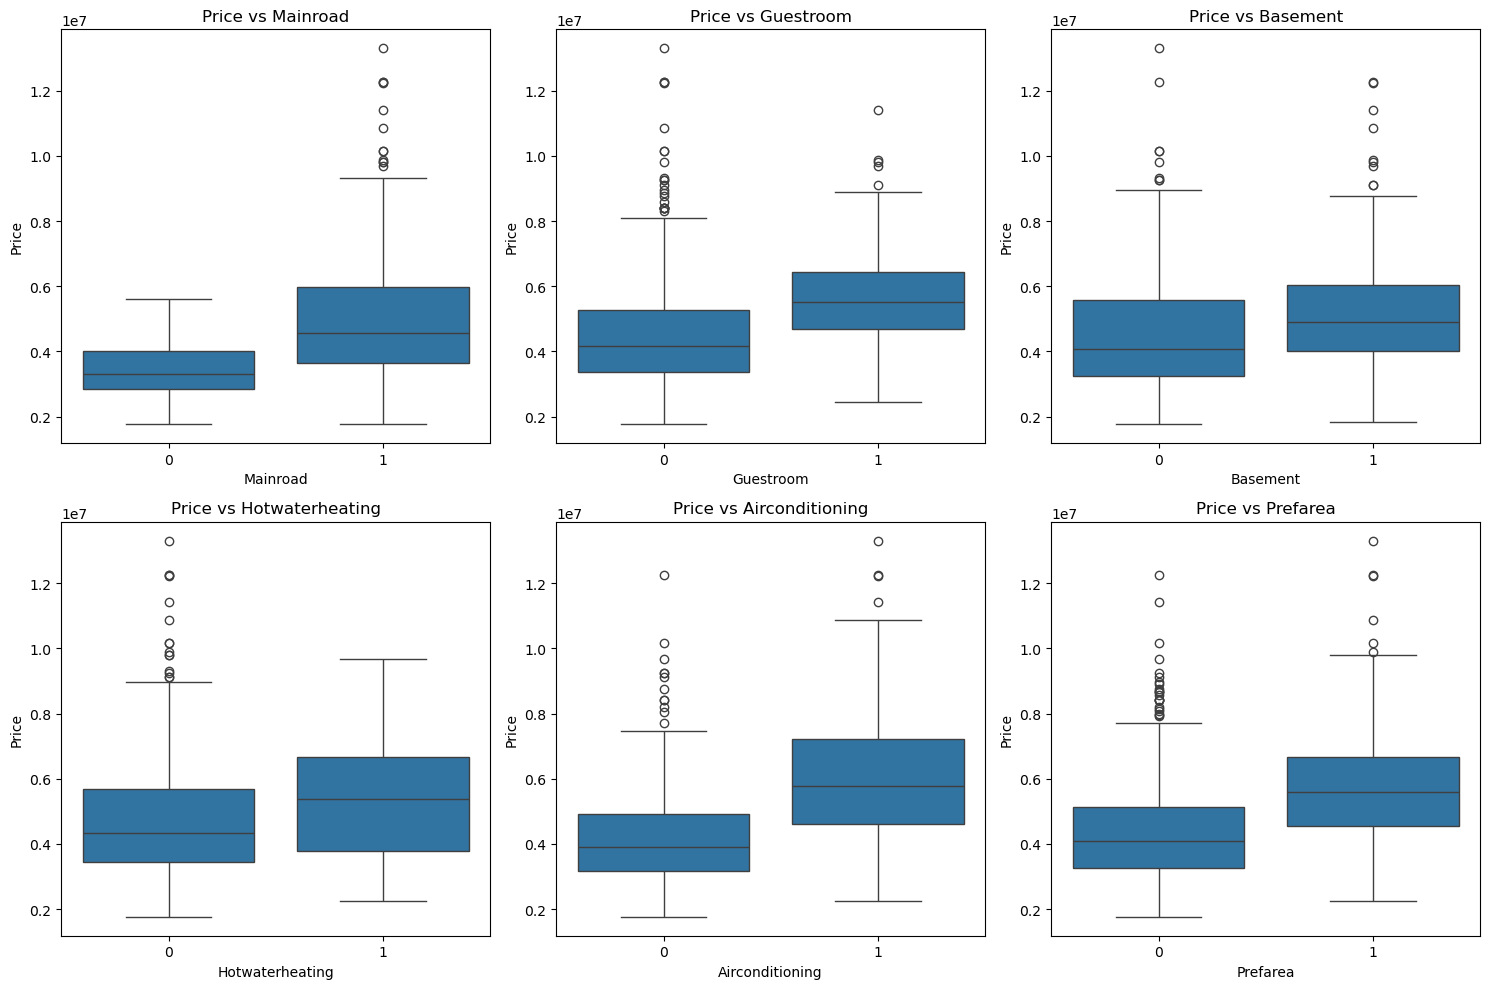

In [8]:
# step 3: Exploratory Data Analysis 
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Exploratory Data Analysis (EDA)

# Plot the distribution of the target variable 'price'
plt.figure(figsize=(8, 5))
sns.histplot(housing_data['price'], kde=True, bins=30, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplots for categorical variables against price to observe trends
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                        'airconditioning', 'prefarea']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=housing_data[feature], y=housing_data['price'])
    plt.title(f"Price vs {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Price")
plt.tight_layout()
plt.show()


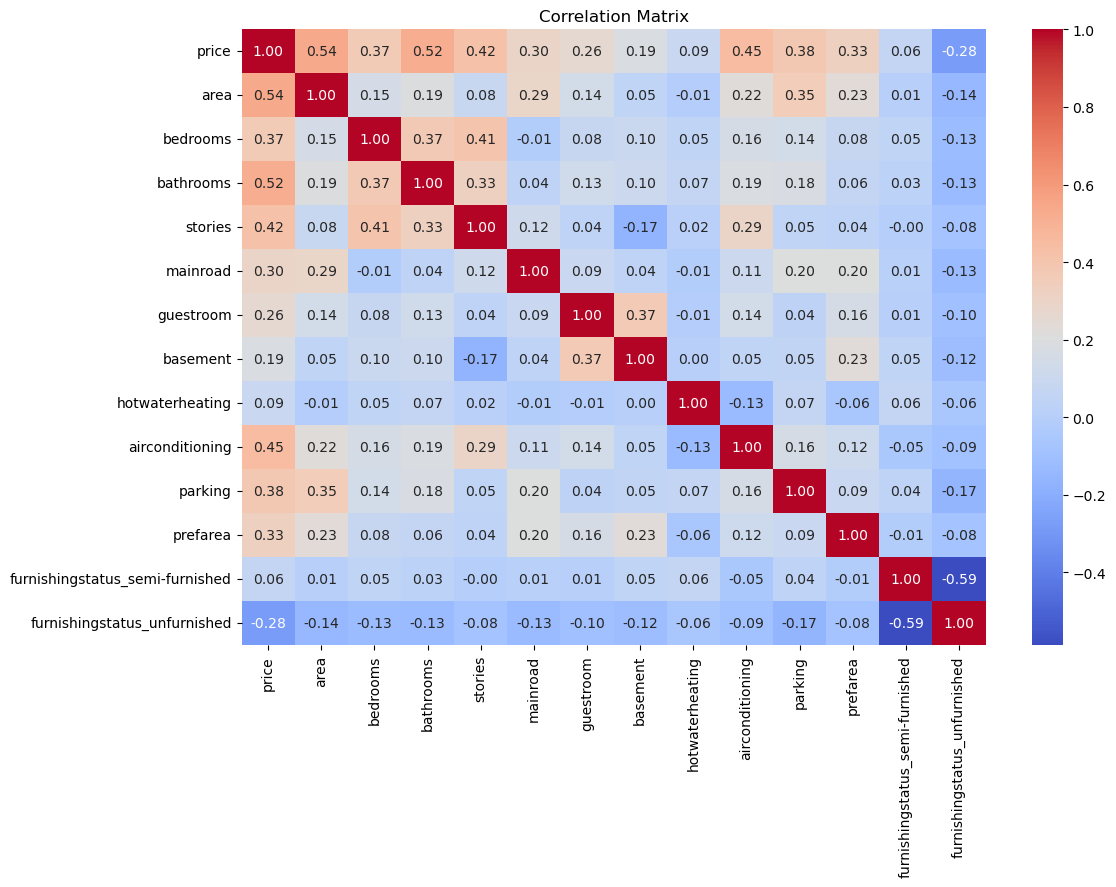

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

In [10]:
# step 4: Correlation analysis


correlation_matrix = housing_data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_correlation


In [14]:
# step 5 : Training multiple linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred)**0.5)
print("R-squared:", r2_score(y_test, y_pred))


Mean Absolute Error: 979679.6912959905
Root Mean Squared Error: 1331071.4167895105
R-squared: 0.6494754192267804


In [18]:
# prediction of house prices
predicted_prices = model.predict(X)

results = pd.DataFrame({'Actual Price': y,'Predicted Price': predicted_prices})

print(results.head())  

   Actual Price  Predicted Price
0      13310000     8.014072e+06
1      12260000     1.057359e+07
2      12260000     7.525543e+06
3      12225000     8.245633e+06
4      11420000     6.507137e+06
